# HR Analytics

## Introdution
In this project, We would try to understand, why some employee get promotion, some leave the company and some doesn't get promotion using kaggle dataset. This report will help management to take necessary decision for their future planning.

## Loading Libraries

In [1]:
import pandas as pd #Data Manipulation
import numpy as np #Data Manipulation

import matplotlib.pyplot as plt #Plotting
# %matplotlib inline
import seaborn as sns #Plotting
sns.set(style='white')

from sklearn import preprocessing #Preprocessing

from scipy.stats import skew, boxcox_normmax #Preprocessing
from scipy.special import boxcox1p #Preprocessing

from sklearn.model_selection import train_test_split #Train/Test Split
from sklearn.linear_model import LogisticRegression #Model

from sklearn.metrics import classification_report #Metrics
from sklearn.metrics import confusion_matrix #Metrics
from sklearn.metrics import accuracy_score #Metrics
from sklearn.metrics import roc_auc_score, roc_curve #ROC
from sklearn import model_selection #Cross Validation
from sklearn.feature_selection import RFE, RFECV #Feature Selection

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Data Loading

In [2]:
# reading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# first 5 rows of train dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [5]:
# first 5 rows of test data
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## Data Preparation

In [6]:
# getting their shapes
print('In train dataset :- Rows',train.shape[0],'| Columns',train.shape[1])
print('In test dataset :- Rows',test.shape[0],'| Columns',test.shape[1])

In train dataset :- Rows 54808 | Columns 14
In test dataset :- Rows 23490 | Columns 13


In [7]:
def data_des(df):
    desc = pd.DataFrame({
        'dtypes':df.dtypes,
        "NAs":df.isnull().sum(),
        'Categorical': df.dtypes == 'object',
        'Numerical': (df.dtypes != 'object') & (df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() != len(df)),
        'Boolean': df.apply(lambda column: column == 0).sum() + df.apply(lambda column: column == 1).sum() == len(df)
    })
    return desc

data_des(train)

,dtypes,NAs,Categorical,Numerical,Boolean
employee_id,int64,0,False,True,False
department,object,0,True,False,False
region,object,0,True,False,False
education,object,2409,True,False,False
gender,object,0,True,False,False
recruitment_channel,object,0,True,False,False
no_of_trainings,int64,0,False,True,False
age,int64,0,False,True,False
previous_year_rating,float64,4124,False,True,False
length_of_service,int64,0,False,True,False


In [8]:
# summarize numerical variables
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
train['department'].unique().tolist()

['Sales & Marketing',
 'Operations',
 'Technology',
 'Analytics',
 'R&D',
 'Procurement',
 'Finance',
 'HR',
 'Legal']

In [10]:
# checking if there is any NULL value in the dataset
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

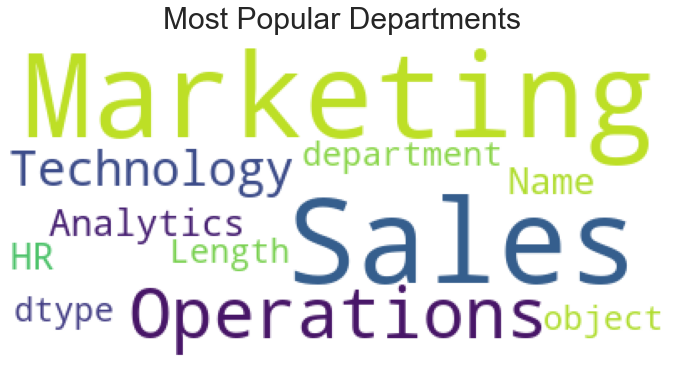

In [12]:
# looking at the most popular departments

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(train['department']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Departments', fontsize = 30)
plt.axis('off')
plt.show()

In [13]:
# checkig the no. of Employees Promoted
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [14]:
# finding the % of people promoted
promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


### 8.52% of the employees listed in the dataset got promoted

The dataset is not balanced, which might introduce some bias in the predictive model.

In [15]:
train.groupby('is_promoted').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,
0,39187.520423,1.257639,34.844037,3.267911,5.879398,0.319685,0.014180,62.647686
1,39285.092331,1.203299,34.372965,3.986140,5.716367,0.698800,0.119751,71.325193


## Correlation Analysis
A correlation analysis will allow to identify relationships between the dataset variables.

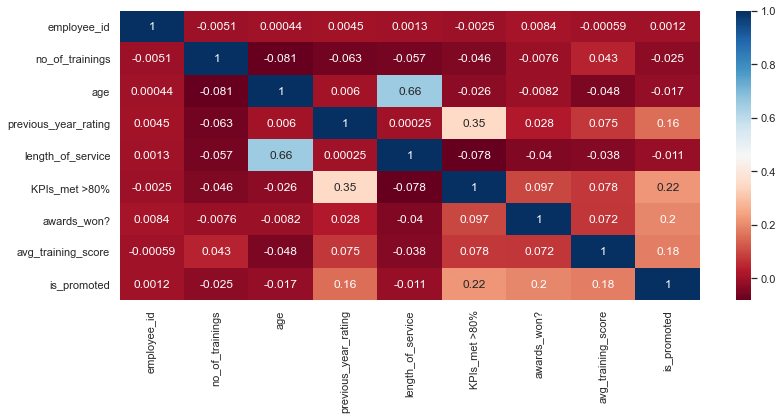

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True,cmap='RdBu')
plt.tight_layout()

In [17]:
train['department'].value_counts()/len(train)*100

Sales & Marketing    30.725442
Operations           20.705007
Technology           13.023646
Procurement          13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: department, dtype: float64

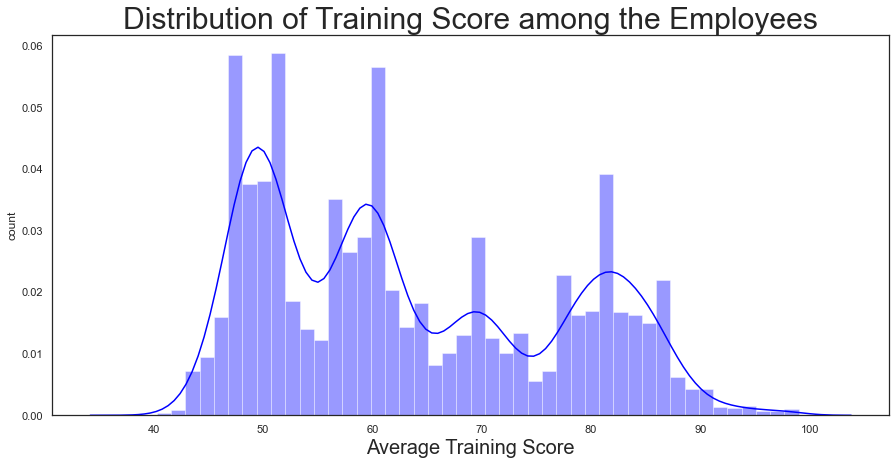

In [18]:
# checking the distribution of the avg_training score of the Employees

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['avg_training_score'], color = 'blue')
sns.set_style('whitegrid')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [19]:
# no of employee won awards
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

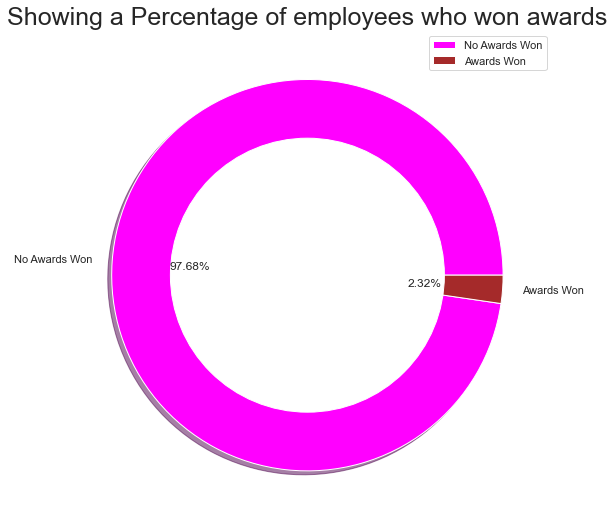

In [20]:
size = [53538, 1270]
colors = ['magenta', 'brown']
labels = "No Awards Won", "Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 25)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [21]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

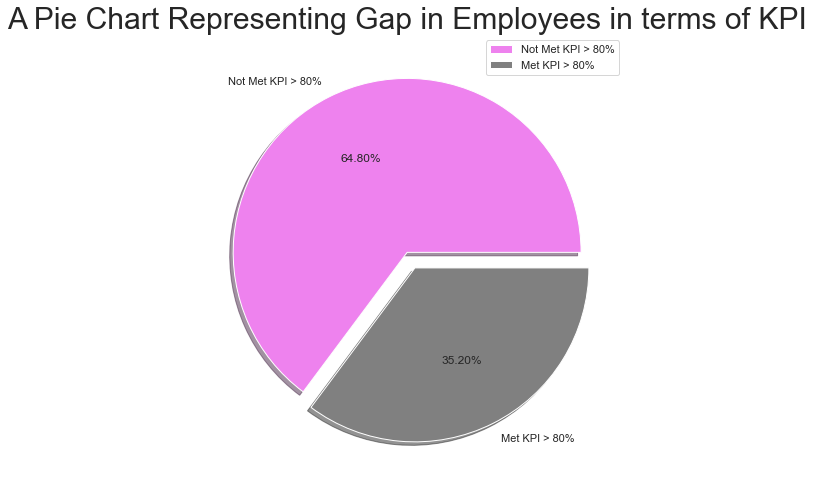

In [22]:
# plotting a pie chart

size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

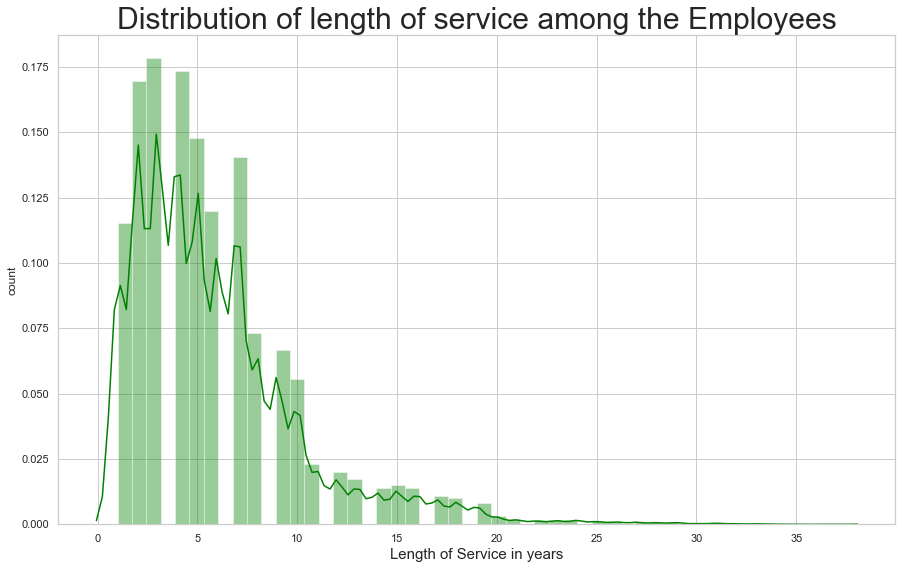

In [23]:
# checking the distribution of length of service
plt.rcParams['figure.figsize']=(15,9)
sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

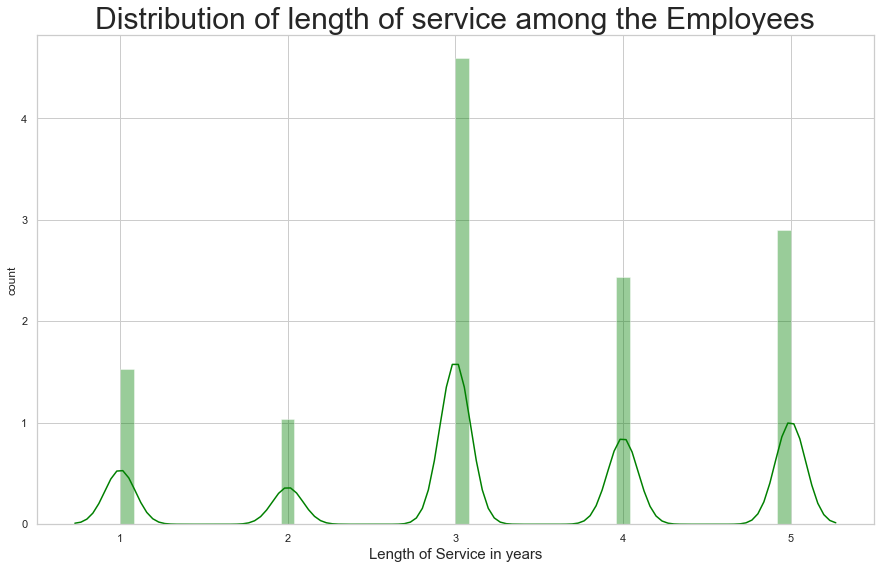

In [24]:
# distribution of Previous year rating of the employees
# checking the distribution of length of service
plt.rcParams['figure.figsize']=(15,9)
sns.distplot(train['previous_year_rating'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years', fontsize = 15)
plt.ylabel('count')
plt.show()

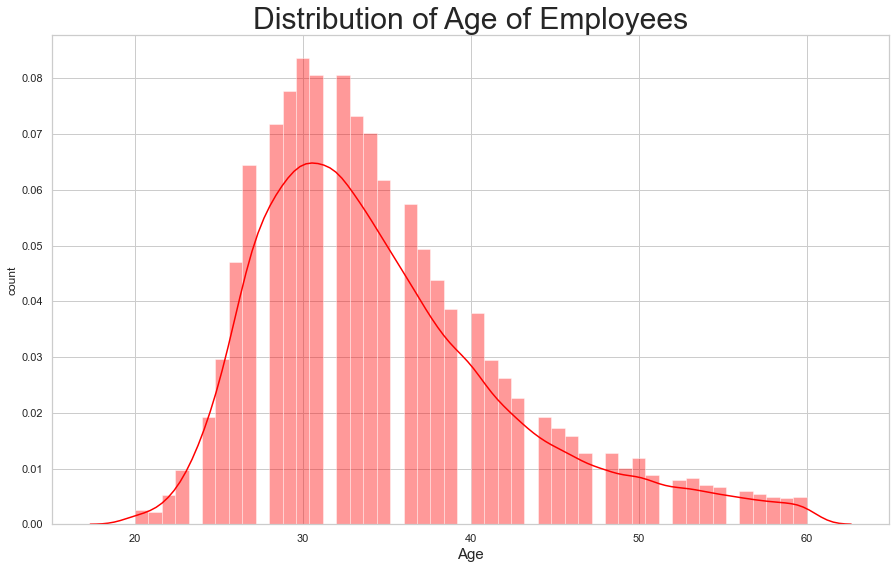

In [25]:
# checking the distribution of age of Employees in the company

sns.distplot(train['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 30)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('count')
plt.show()

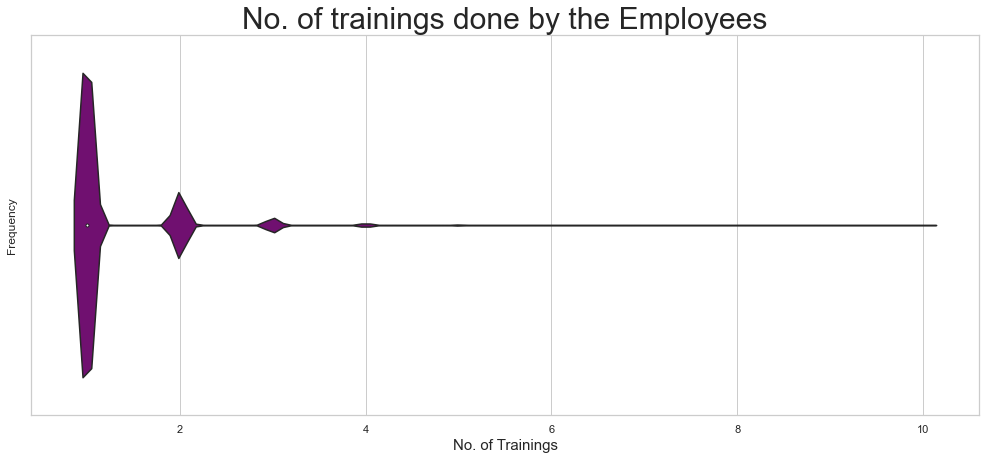

In [26]:
# checking the different no. of training done by the employees
plt.rcParams['figure.figsize'] = (17, 7)
sns.violinplot(train['no_of_trainings'], color = 'purple')
plt.title('No. of trainings done by the Employees', fontsize = 30)
plt.xlabel('No. of Trainings', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

In [27]:
# checking the different types of recruitment channels for the company
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

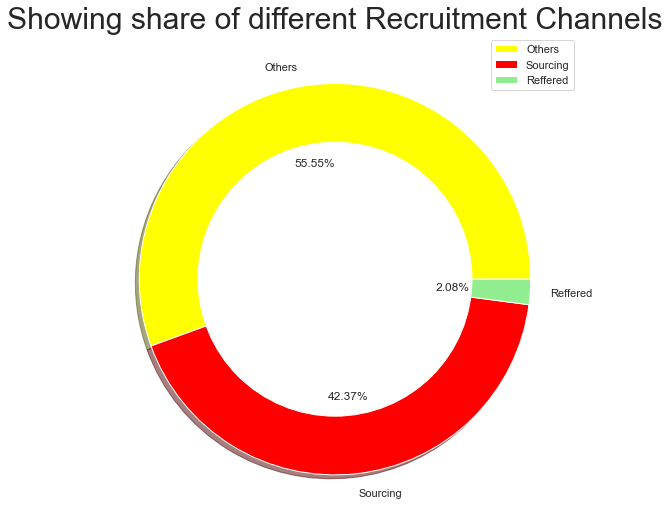

In [28]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['yellow', 'red', 'lightgreen']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

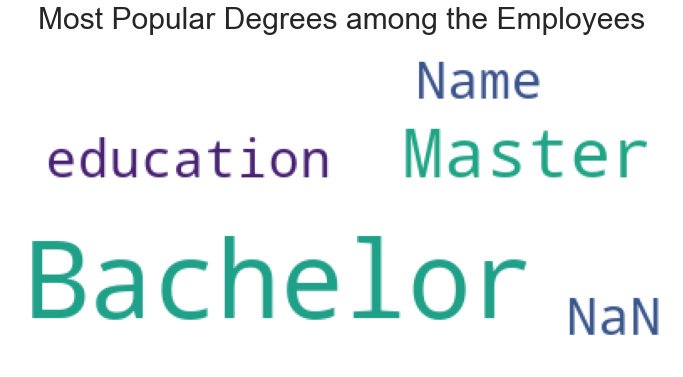

In [29]:
# checing the most popular education degree among the employees

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword, max_words = 5).generate(str(train['education']))

plt.rcParams['figure.figsize'] = (12, 8)
print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Degrees among the Employees', fontsize = 30)
plt.axis('off')
plt.show()

In [30]:
# checking the gender gap
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

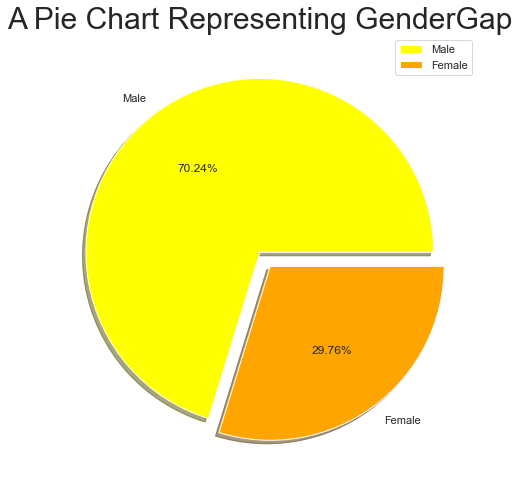

In [31]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

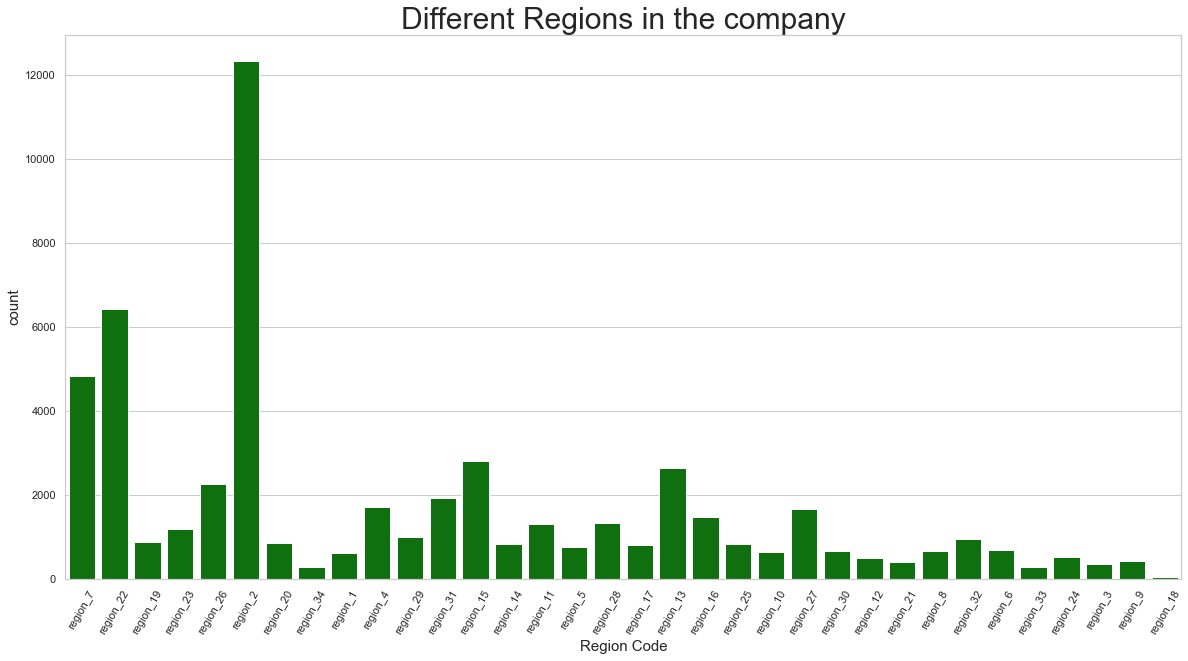

In [32]:
# checking the different regions of the company

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(train['region'], color = 'green')
plt.title('Different Regions in the company', fontsize = 30)
sns.set_style('whitegrid')
plt.xticks(rotation = 60)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

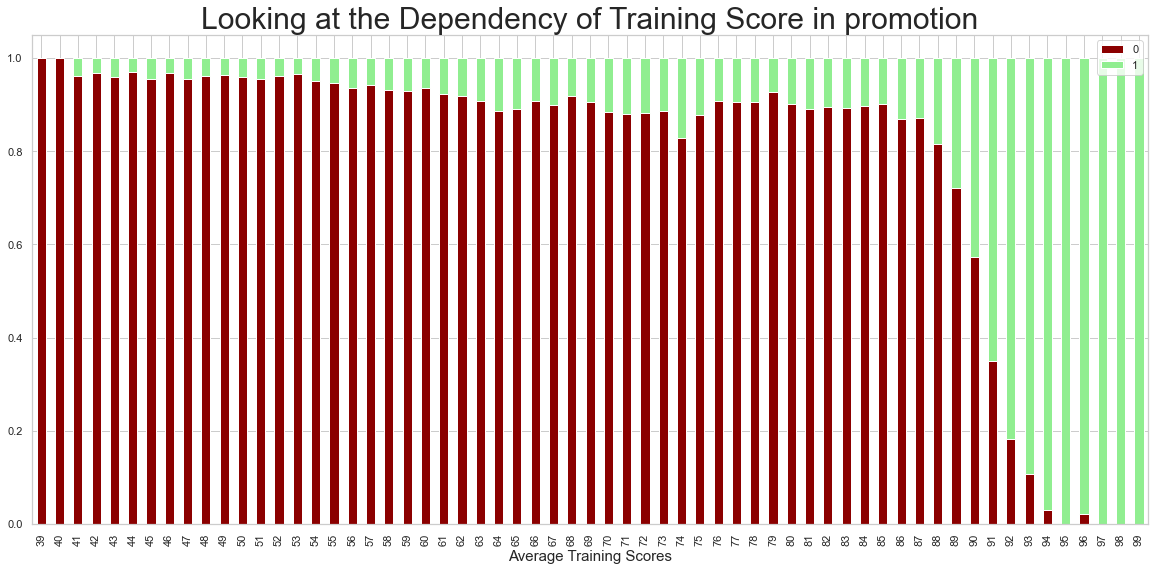

In [33]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

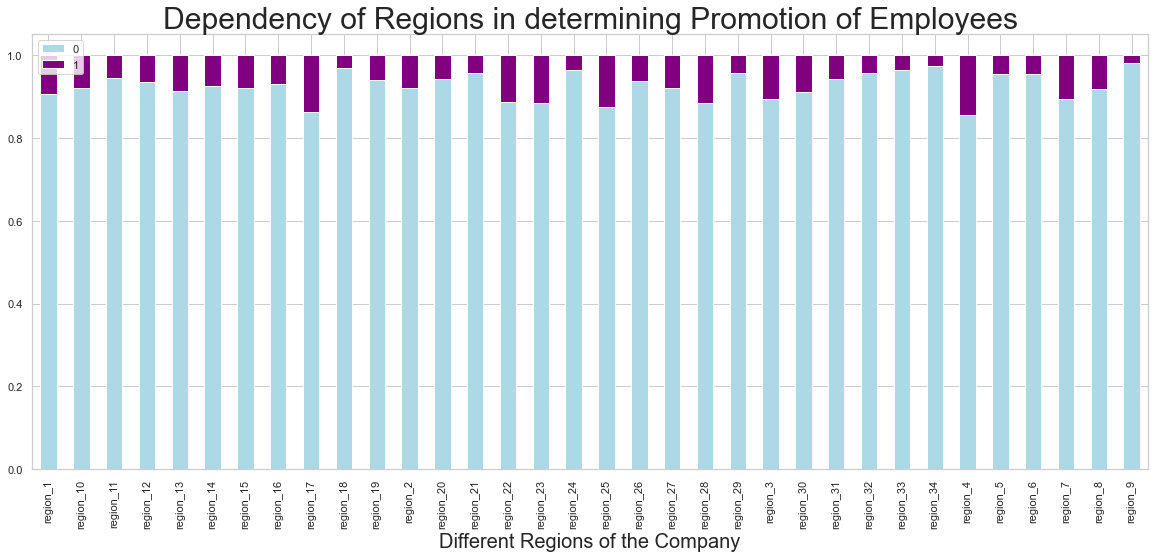

In [34]:
# checking dependency of different regions in promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

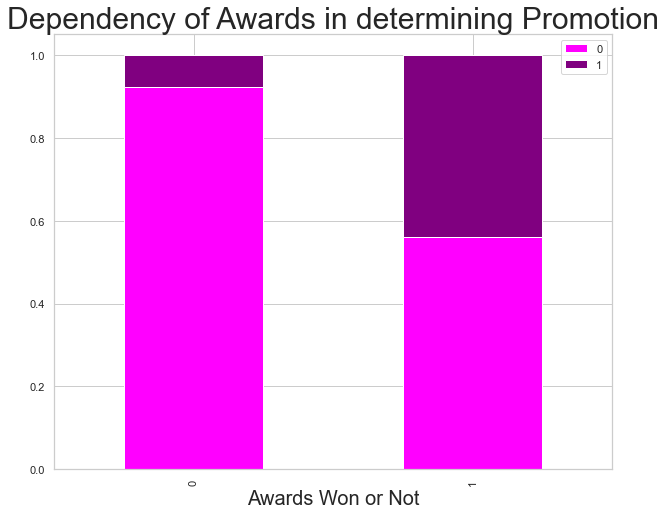

In [35]:
# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

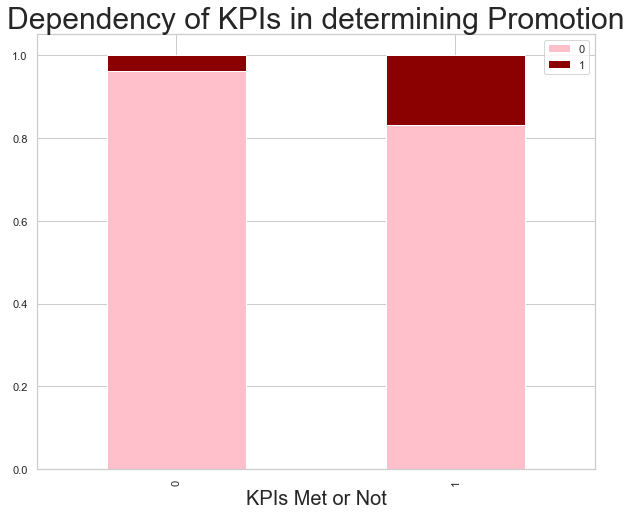

In [36]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

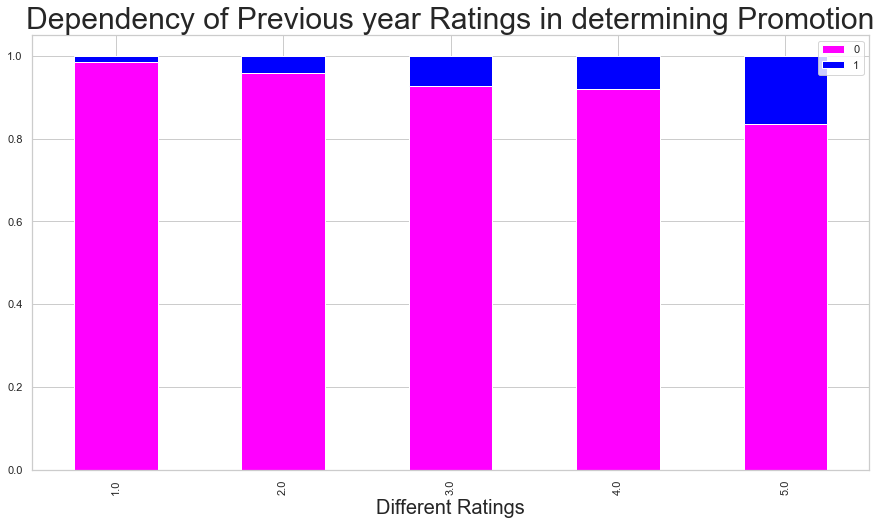

In [37]:
# checking dependency on previous years' ratings

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['magenta', 'blue'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

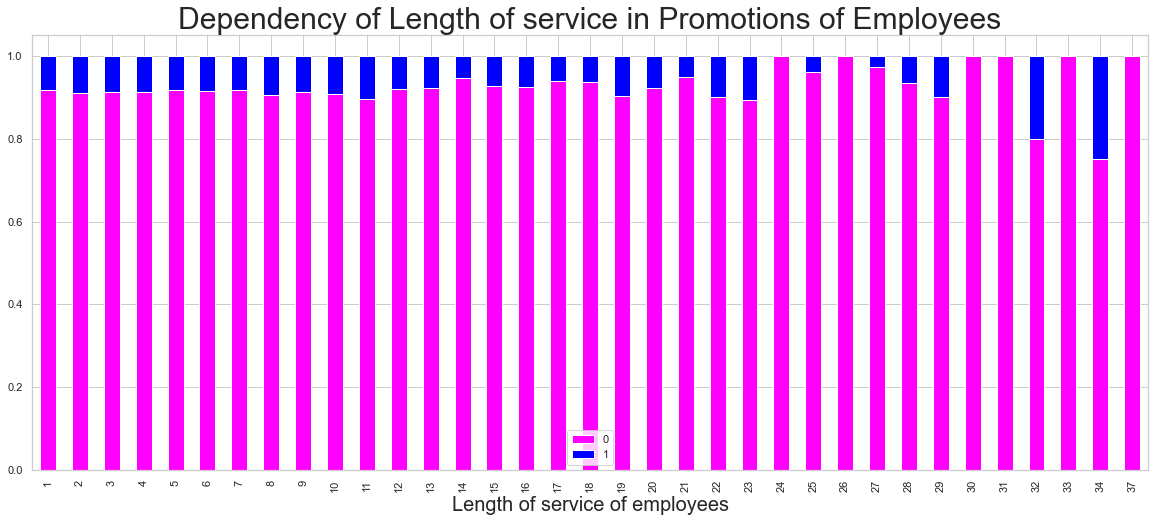

In [38]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['magenta', 'blue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()


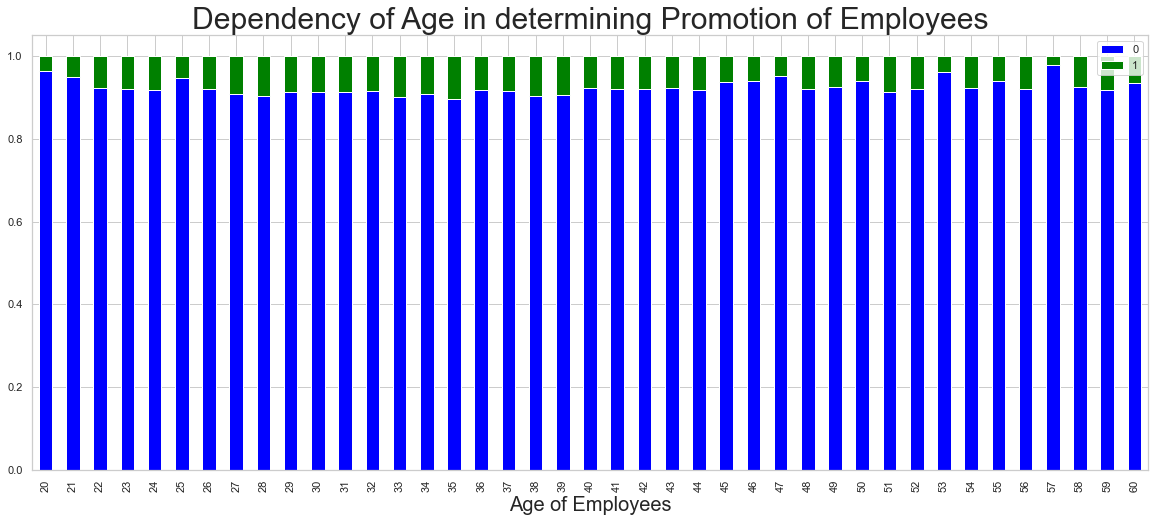

In [39]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['blue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

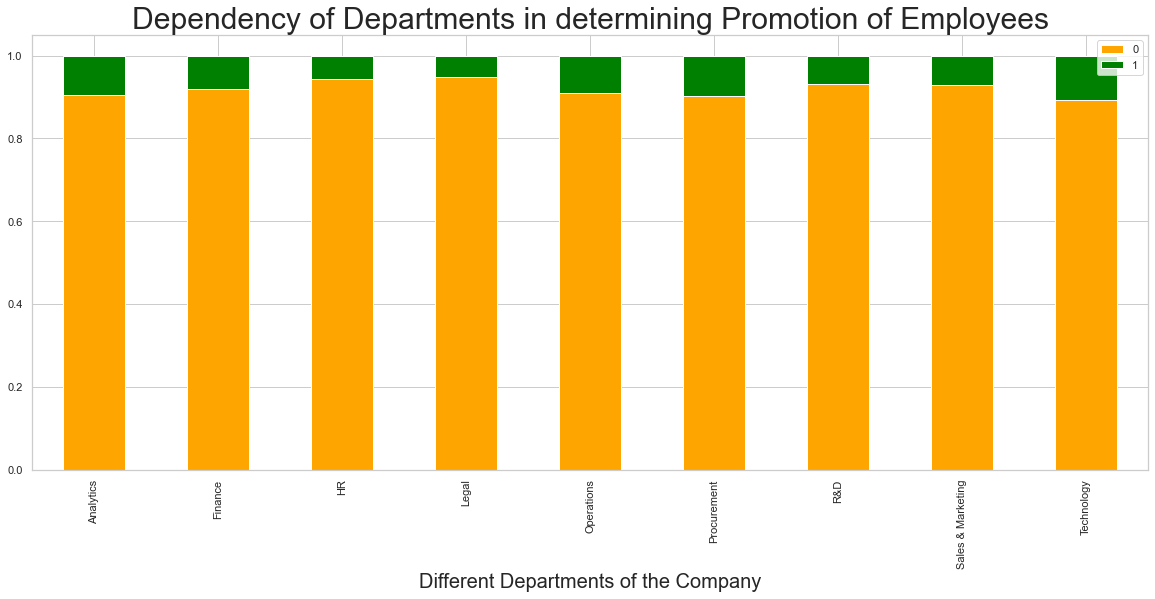

In [40]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'green'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

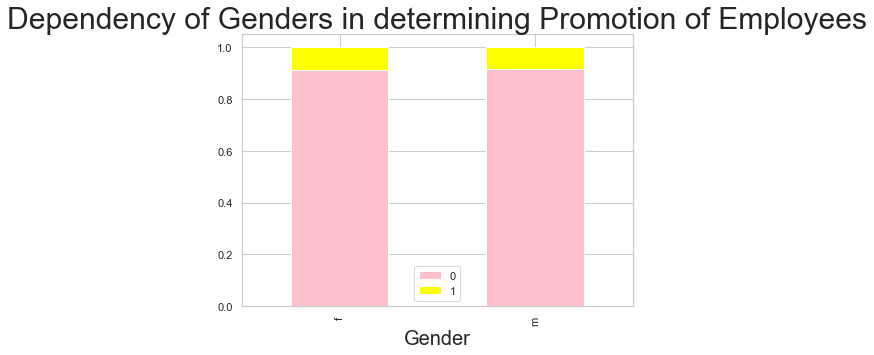

In [41]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

In [42]:
# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [43]:
test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [44]:
# removing the employee_id column
train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [45]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)
test.dropna()
test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [46]:
# defining the test set

x_test = test

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [47]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [48]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [49]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [50]:
x

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0,0,0,...,0,0,1,0,0,0,1,0,0,1
54804,1,37,2.0,6,0,0,56,0,0,0,...,0,0,0,0,1,1,0,1,0,0
54805,1,27,5.0,3,1,0,79,1,0,0,...,0,0,1,0,0,0,1,1,0,0
54806,1,29,1.0,2,0,0,45,0,0,0,...,0,1,1,0,0,0,1,0,0,1


In [51]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [52]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [53]:
# standard scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

y_train.fillna(y_train.mean())

,0
46838,0
72552,1
6015,0
26288,0
61812,1
...,...
21243,0
45891,0
42613,0
43567,0


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)



print("Training Accuracy :", rfc.score(x_train, y_train))

Training Accuracy : 0.9998130235341045


In [55]:
rfc_pred = rfc.predict(x_test)

### Xg-Boost Classifier

In [56]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

Training Accuracy : 0.9647985640207419


### Light Gradient Boosting Classifier

In [57]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

Training Accuracy : 0.9598125249301954


### Extra Trees Classifier

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

Training Accuracy : 0.9998130235341045


In [59]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(learning_rate = 0.004, early_stopping_rounds = 100)
cbc.fit(x_train, y_train)

cbc_pred = cbc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train)) 

0:	learn: 0.6900116	total: 100ms	remaining: 1m 40s
1:	learn: 0.6871085	total: 132ms	remaining: 1m 6s
2:	learn: 0.6836504	total: 164ms	remaining: 54.4s
3:	learn: 0.6805391	total: 195ms	remaining: 48.6s
4:	learn: 0.6778277	total: 234ms	remaining: 46.5s
5:	learn: 0.6750350	total: 275ms	remaining: 45.6s
6:	learn: 0.6722122	total: 309ms	remaining: 43.8s
7:	learn: 0.6699836	total: 356ms	remaining: 44.1s
8:	learn: 0.6669753	total: 390ms	remaining: 42.9s
9:	learn: 0.6637267	total: 435ms	remaining: 43s
10:	learn: 0.6611135	total: 467ms	remaining: 42s
11:	learn: 0.6585331	total: 509ms	remaining: 41.9s
12:	learn: 0.6560198	total: 552ms	remaining: 41.9s
13:	learn: 0.6538994	total: 584ms	remaining: 41.1s
14:	learn: 0.6514176	total: 624ms	remaining: 41s
15:	learn: 0.6492049	total: 665ms	remaining: 40.9s
16:	learn: 0.6471055	total: 706ms	remaining: 40.8s
17:	learn: 0.6447837	total: 740ms	remaining: 40.4s
18:	learn: 0.6421001	total: 778ms	remaining: 40.2s
19:	learn: 0.6392974	total: 810ms	remaining: 3

164:	learn: 0.4494195	total: 6.19s	remaining: 31.3s
165:	learn: 0.4476711	total: 6.22s	remaining: 31.3s
166:	learn: 0.4470631	total: 6.26s	remaining: 31.2s
167:	learn: 0.4467167	total: 6.29s	remaining: 31.2s
168:	learn: 0.4449842	total: 6.33s	remaining: 31.1s
169:	learn: 0.4443731	total: 6.37s	remaining: 31.1s
170:	learn: 0.4438342	total: 6.4s	remaining: 31.1s
171:	learn: 0.4425249	total: 6.44s	remaining: 31s
172:	learn: 0.4419919	total: 6.48s	remaining: 31s
173:	learn: 0.4413908	total: 6.52s	remaining: 30.9s
174:	learn: 0.4397777	total: 6.55s	remaining: 30.9s
175:	learn: 0.4392591	total: 6.59s	remaining: 30.9s
176:	learn: 0.4386783	total: 6.63s	remaining: 30.8s
177:	learn: 0.4380181	total: 6.66s	remaining: 30.8s
178:	learn: 0.4375277	total: 6.7s	remaining: 30.7s
179:	learn: 0.4368319	total: 6.73s	remaining: 30.7s
180:	learn: 0.4361599	total: 6.76s	remaining: 30.6s
181:	learn: 0.4348931	total: 6.8s	remaining: 30.6s
182:	learn: 0.4343407	total: 6.84s	remaining: 30.5s
183:	learn: 0.43305

328:	learn: 0.3524408	total: 12.1s	remaining: 24.8s
329:	learn: 0.3522758	total: 12.2s	remaining: 24.7s
330:	learn: 0.3518640	total: 12.2s	remaining: 24.7s
331:	learn: 0.3517191	total: 12.3s	remaining: 24.7s
332:	learn: 0.3512812	total: 12.3s	remaining: 24.6s
333:	learn: 0.3507465	total: 12.3s	remaining: 24.6s
334:	learn: 0.3499799	total: 12.4s	remaining: 24.5s
335:	learn: 0.3494892	total: 12.4s	remaining: 24.5s
336:	learn: 0.3493214	total: 12.4s	remaining: 24.5s
337:	learn: 0.3491523	total: 12.5s	remaining: 24.4s
338:	learn: 0.3488022	total: 12.5s	remaining: 24.4s
339:	learn: 0.3484563	total: 12.5s	remaining: 24.3s
340:	learn: 0.3481764	total: 12.6s	remaining: 24.3s
341:	learn: 0.3476678	total: 12.6s	remaining: 24.3s
342:	learn: 0.3472581	total: 12.7s	remaining: 24.2s
343:	learn: 0.3470135	total: 12.7s	remaining: 24.2s
344:	learn: 0.3463319	total: 12.7s	remaining: 24.2s
345:	learn: 0.3458430	total: 12.8s	remaining: 24.1s
346:	learn: 0.3453219	total: 12.8s	remaining: 24.1s
347:	learn: 

487:	learn: 0.3053287	total: 17.9s	remaining: 18.8s
488:	learn: 0.3048442	total: 18s	remaining: 18.8s
489:	learn: 0.3044841	total: 18s	remaining: 18.7s
490:	learn: 0.3043772	total: 18s	remaining: 18.7s
491:	learn: 0.3042908	total: 18.1s	remaining: 18.7s
492:	learn: 0.3041980	total: 18.1s	remaining: 18.6s
493:	learn: 0.3040922	total: 18.1s	remaining: 18.6s
494:	learn: 0.3038956	total: 18.2s	remaining: 18.6s
495:	learn: 0.3036127	total: 18.2s	remaining: 18.5s
496:	learn: 0.3031532	total: 18.3s	remaining: 18.5s
497:	learn: 0.3027152	total: 18.3s	remaining: 18.4s
498:	learn: 0.3024158	total: 18.3s	remaining: 18.4s
499:	learn: 0.3023197	total: 18.4s	remaining: 18.4s
500:	learn: 0.3020718	total: 18.4s	remaining: 18.3s
501:	learn: 0.3019844	total: 18.5s	remaining: 18.3s
502:	learn: 0.3015629	total: 18.5s	remaining: 18.3s
503:	learn: 0.3013200	total: 18.5s	remaining: 18.2s
504:	learn: 0.3012247	total: 18.6s	remaining: 18.2s
505:	learn: 0.3010978	total: 18.6s	remaining: 18.2s
506:	learn: 0.3010

646:	learn: 0.2767715	total: 23.8s	remaining: 13s
647:	learn: 0.2765173	total: 23.9s	remaining: 13s
648:	learn: 0.2764420	total: 23.9s	remaining: 12.9s
649:	learn: 0.2763700	total: 23.9s	remaining: 12.9s
650:	learn: 0.2762889	total: 24s	remaining: 12.9s
651:	learn: 0.2761408	total: 24s	remaining: 12.8s
652:	learn: 0.2760458	total: 24s	remaining: 12.8s
653:	learn: 0.2759066	total: 24.1s	remaining: 12.7s
654:	learn: 0.2754780	total: 24.1s	remaining: 12.7s
655:	learn: 0.2754007	total: 24.1s	remaining: 12.7s
656:	learn: 0.2751976	total: 24.2s	remaining: 12.6s
657:	learn: 0.2751266	total: 24.2s	remaining: 12.6s
658:	learn: 0.2750544	total: 24.2s	remaining: 12.5s
659:	learn: 0.2749793	total: 24.3s	remaining: 12.5s
660:	learn: 0.2749002	total: 24.3s	remaining: 12.5s
661:	learn: 0.2748345	total: 24.4s	remaining: 12.4s
662:	learn: 0.2747568	total: 24.4s	remaining: 12.4s
663:	learn: 0.2746863	total: 24.4s	remaining: 12.4s
664:	learn: 0.2746200	total: 24.5s	remaining: 12.3s
665:	learn: 0.2744962	

805:	learn: 0.2586867	total: 29.5s	remaining: 7.11s
806:	learn: 0.2586372	total: 29.6s	remaining: 7.08s
807:	learn: 0.2584483	total: 29.6s	remaining: 7.04s
808:	learn: 0.2583910	total: 29.7s	remaining: 7s
809:	learn: 0.2583385	total: 29.7s	remaining: 6.97s
810:	learn: 0.2581162	total: 29.7s	remaining: 6.93s
811:	learn: 0.2580642	total: 29.8s	remaining: 6.89s
812:	learn: 0.2579772	total: 29.8s	remaining: 6.86s
813:	learn: 0.2579097	total: 29.9s	remaining: 6.82s
814:	learn: 0.2577537	total: 29.9s	remaining: 6.79s
815:	learn: 0.2576885	total: 29.9s	remaining: 6.75s
816:	learn: 0.2576410	total: 30s	remaining: 6.71s
817:	learn: 0.2575755	total: 30s	remaining: 6.67s
818:	learn: 0.2575218	total: 30s	remaining: 6.64s
819:	learn: 0.2574595	total: 30.1s	remaining: 6.6s
820:	learn: 0.2574100	total: 30.1s	remaining: 6.57s
821:	learn: 0.2573622	total: 30.1s	remaining: 6.53s
822:	learn: 0.2573042	total: 30.2s	remaining: 6.49s
823:	learn: 0.2571612	total: 30.2s	remaining: 6.45s
824:	learn: 0.2569844	

965:	learn: 0.2456942	total: 35.3s	remaining: 1.24s
966:	learn: 0.2456107	total: 35.3s	remaining: 1.21s
967:	learn: 0.2455512	total: 35.4s	remaining: 1.17s
968:	learn: 0.2453404	total: 35.4s	remaining: 1.13s
969:	learn: 0.2452920	total: 35.5s	remaining: 1.1s
970:	learn: 0.2452400	total: 35.5s	remaining: 1.06s
971:	learn: 0.2451875	total: 35.5s	remaining: 1.02s
972:	learn: 0.2451485	total: 35.6s	remaining: 987ms
973:	learn: 0.2451027	total: 35.6s	remaining: 950ms
974:	learn: 0.2450661	total: 35.6s	remaining: 913ms
975:	learn: 0.2450227	total: 35.7s	remaining: 877ms
976:	learn: 0.2449828	total: 35.7s	remaining: 840ms
977:	learn: 0.2449271	total: 35.7s	remaining: 803ms
978:	learn: 0.2448800	total: 35.8s	remaining: 767ms
979:	learn: 0.2448202	total: 35.8s	remaining: 730ms
980:	learn: 0.2447724	total: 35.8s	remaining: 694ms
981:	learn: 0.2447217	total: 35.9s	remaining: 657ms
982:	learn: 0.2446709	total: 35.9s	remaining: 621ms
983:	learn: 0.2446211	total: 35.9s	remaining: 584ms
984:	learn: 0